In [230]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [231]:
#Read in the csv file and convert to a Pandas dataframe
arwu_df = pd.read_excel('./data/shanghai Ranking.xlsx')
the_df = pd.read_excel('./data/Times Higher Education.xlsx')
cwur_df = pd.read_excel('./data/World Rank University.xlsx')


dataframes = {
    'Shanghai Ranking': arwu_df,
    'Times Higher Education': the_df,
    'World Rank University': cwur_df
}

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [249]:

def clean_rank_column(column):
    # Replace unwanted characters with NaN
    column = column.replace({' ': 0, '-': 0})
    # Convert to numeric, forcing errors to NaN
    column = pd.to_numeric(column, errors='coerce').fillna(0).astype('int64')
    return column

rank_columns = ['Educational Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank']
for col in rank_columns:
    cwur_df[col] = clean_rank_column(cwur_df[col])

print(cwur_df[rank_columns].isnull().sum())


Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
dtype: int64


In [244]:
cwur_df.columns

Index(['World Rank', 'University Name', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

In [245]:
cwur_df.rename(columns={'Location ': 'Location'}, inplace=True)

In [259]:
def clean_rank_column(column):
    column = column.replace({' ': 0, '-':0}).astype('int64')
    return column
    
rank_columns = ['Educational Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank']
for col in rank_columns:
    cwur_df[col] = clean_rank_column(cwur_df[col])

print(cwur_df[rank_columns].isnull().sum())

Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
dtype: int64


In [268]:
def remove_rating(text):
    return text.split('\n')[0].strip() 

cwur_df['University Name'] = cwur_df['University Name'].apply(remove_rating)

cwur_df

,World Rank,University Name,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score,University Names
0,1Top 0.1%,Harvard University,USA,1,1,1,1,1,100.0,Harvard University
1,2Top 0.1%,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7,Massachusetts Institute of Technology
2,3Top 0.1%,Stanford University,USA,3,11,4,2,2,95.2,Stanford University
3,4Top 0.1%,University of Cambridge,United Kingdom,1,3,25,5,11,94.1,University of Cambridge
4,5Top 0.1%,University of Oxford,United Kingdom,2,7,27,9,4,93.3,University of Oxford
...,...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0,Chongqing Jiaotong University
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0,University of Arkansas at Little Rock
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0,Van Yüzüncü Yıl University
1998,1999Top 9.8%,Bharathidasan University,India,64,0,0,0,1922,66.0,Bharathidasan University


In [270]:
arwu_df['Location'] = arwu_df['University Name'].apply(
    lambda x: (
        the_df.loc[the_df['University Name'] == x, 'Location'].values[0] if not the_df.loc[the_df['University Name'] == x, 'Location'].empty 
        else (
            cwur_df.loc[cwur_df['University Name'] == x, 'Location'].values[0] if not cwur_df.loc[cwur_df['University Name'] == x, 'Location'].empty 
            else None
        )
    )
)


In [262]:
# Convert 'World Rank' to numeric and handle errors
arwu_df['World Rank'] = pd.to_numeric(arwu_df['World Rank'], errors='coerce')

# Group by the converted 'World Rank' with correct labels
grouped_df = arwu_df.groupby(pd.cut(arwu_df['World Rank'], 
    bins=[0, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
    right=True, 
    labels=['1-100', '101-150', '151-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000'])
).agg({'Total Score': 'mean', 'University Name': 'count'}).reset_index().sort_values(by='Total Score')


C:\Users\queen\AppData\Local\Temp\ipykernel_22936\259426369.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [264]:
# Assuming df is your DataFrame
arwu_df.loc[100:999, 'World Rank'] = arwu_df.loc[100:999, 'World Rank'].replace(0.0, pd.NA)  # Replace 0.0 with NaN first
arwu_df.loc[100:999, 'World Rank'] = range(100, 100 + len(arwu_df.loc[100:999, 'World Rank']))

# This will increment numbers from 100 onwards in the 'World Rank' column from index 100 to 999


In [265]:
arwu_df['World Rank'] = arwu_df['World Rank'].astype(int)

In [266]:
arwu_df['National/Regional Rank'] = arwu_df['National/Regional Rank'].apply(
    lambda x: min(map(int, x.replace('-', ' ').split())) if pd.notna(x) else None
)

In [273]:
arwu_df.loc[110, 'National/Regional Rank'] = 2

In [349]:
result = arwu_df[arwu_df['Location'] == 'Saudi Arabia']
result

,World Rank,University Name,National/Regional Rank,Total Score,Location,University Detail
109,109,King Abdulaziz University,1,0.0,Saudi Arabia,http://www.shanghairanking.com/institution/kin...
110,110,King Saud University,2,0.0,Saudi Arabia,http://www.shanghairanking.com/institution/kin...
222,222,King Abdullah University of Science and Techno...,3,0.0,Saudi Arabia,http://www.shanghairanking.com/institution/kin...
446,446,Taif University,4,0.0,Saudi Arabia,http://www.shanghairanking.com/institution/tai...
631,631,King Khalid University,6,0.0,Saudi Arabia,http://www.shanghairanking.com/institution/kin...
855,855,Prince Sattam Bin Abdulaziz University,7,0.0,Saudi Arabia,http://www.shanghairanking.com/institution/pri...


In [311]:
#rank_5_info = arwu_df[arwu_df['National/Regional Rank'] == 5][['University Name', 'Location']]
#print(rank_5_info)

In [274]:
arwu_df

,World Rank,University Name,National/Regional Rank,Total Score,Location,University Detail
0,1,Harvard University,1,100.0,USA,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,USA,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,None,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,United Kingdom,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,USA,http://www.shanghairanking.com/institution/uni...
...,...,...,...,...,...,...
995,995,University of Wuppertal,46,0.0,Germany,http://www.shanghairanking.com/institution/uni...
996,996,Warsaw University of Technology,7,0.0,Poland,http://www.shanghairanking.com/institution/war...
997,997,Western Norway University of Applied Sciences,6,0.0,Norway,http://www.shanghairanking.com/institution/wes...
998,998,Wroclaw University of Science and Technology,7,0.0,None,http://www.shanghairanking.com/institution/wro...


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [276]:
arwu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   World Rank              1000 non-null   int32  
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   int64  
 3   Total Score             1000 non-null   float64
 4   Location                797 non-null    object 
 5   University Detail       1000 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 43.1+ KB


In [178]:
arwu_df.shape

(1000, 6)

In [183]:
arwu_df.describe()

,World Rank,National/Regional Rank,Total Score
count,1000.000000,1000.000000,1000.000000
mean,499.579000,38.244000,5.943500
std,288.694704,47.207849,12.379624
min,1.000000,1.000000,0.000000
25%,249.750000,5.000000,0.000000
50%,499.500000,17.000000,0.000000
75%,749.250000,54.250000,7.500000
max,999.000000,183.000000,100.000000


In [235]:
arwu_df.columns

Index(['Ranking', 'University Name', 'National/Regional Rank', 'Total Score',
       'Location', 'University Detail '],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [277]:
print("My dataset is Reliabel - i take it from kaggel website and it's trustness")

My dataset is Reliabel - i take it from kaggel website and it's trustness


#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [187]:
arwu_df.groupby(['World Rank', 'University Name', 'Location' , 'Total Score']).count()

,,,,National/Regional Rank,University Detail
World Rank,University Name,Location,Total Score,,
1,Harvard University,USA,100.0,1,1
2,Stanford University,USA,76.8,1,1
3,Massachusetts Institute of Technology (MIT),0,70.1,1,1
4,University of Cambridge,United Kingdom,69.6,1,1
5,"University of California, Berkeley",USA,65.3,1,1
...,...,...,...,...,...
995,University of Wuppertal,Germany,0.0,1,1
996,Warsaw University of Technology,Poland,0.0,1,1
997,Western Norway University of Applied Sciences,Norway,0.0,1,1


In [188]:
arwu_df['Total Score'].value_counts()

Total Score
0.0     740
10.7     20
13.1     19
11.9     18
9.2      15
       ... 
36.6      1
37.2      1
37.3      1
38.0      1
25.0      1
Name: count, Length: 106, dtype: int64

In [194]:
arwu_df.replace(0.0, np.nan, inplace=True)

In [ ]:

# Filter data for Saudi Arabian universities
#result = arwu_df[arwu_df['Location'] == 'Saudi Arabia']

# Create a bar chart
#fig = go.Figure()

# Add bar trace for National/Regional Rank
3fig.add_trace(
 #   go.Bar(
  #      x=result['University Name'],
   #     y=result['National/Regional Rank'],
    #    name='National/Regional Rank',
     #   marker_color='blue',
      #  width=0.4  # Increase the width of the bars
  #  )
#)

# Add bar trace for World Rank
#fig.add_trace(
 #   go.Bar(
  #      x=result['University Name'],
   #     y=result['World Rank'],
    #    name='World Rank',
    #    marker_color='lightblue',  # Use a lighter shade for better distinction
    #    width=0.4  # Increase the width of the bars
  #  )
#)

# Update layout
#fig.update_layout(
 #   title='Bar Chart of Rankings for Saudi Arabian Universities',
  #  xaxis_title='University Name',
   # yaxis_title='Rank',
 #   barmode='group',  # Group bars together
 #   xaxis_tickangle=-45,  # Rotate x-axis labels for better visibility
  #  yaxis=dict(range=[0, 400])  # Increased y-axis range
#)

#fig.update_layout(
#    width=1200,
#    height=800,
#)

#fig.show()


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [346]:
arwu_df.duplicated().sum() # duplicated row

0

In [66]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [347]:
#Display number missing values per column
arwu_df.isnull().sum().sort_values(ascending = False)

Location                  203
World Rank                  0
University Name             0
National/Regional Rank      0
Total Score                 0
University Detail           0
dtype: int64

In [68]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [348]:
# check columns types 
arwu_df.dtypes

World Rank                  int32
University Name            object
National/Regional Rank      int64
Total Score               float64
Location                   object
University Detail          object
dtype: object

In [33]:
# go to clean them 

In [3]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [25]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [369]:
arwu_df['National/Regional Rank'].value_counts()

National/Regional Rank
1     68
2     60
9     56
4     48
3     47
      ..
37     1
36     1
24     1
21     1
15     1
Name: count, Length: 62, dtype: int64

In [370]:
arwu_df.dtypes

World Rank                  int32
University Name            object
National/Regional Rank      int64
Total Score               float64
Location                   object
University Detail          object
dtype: object

### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

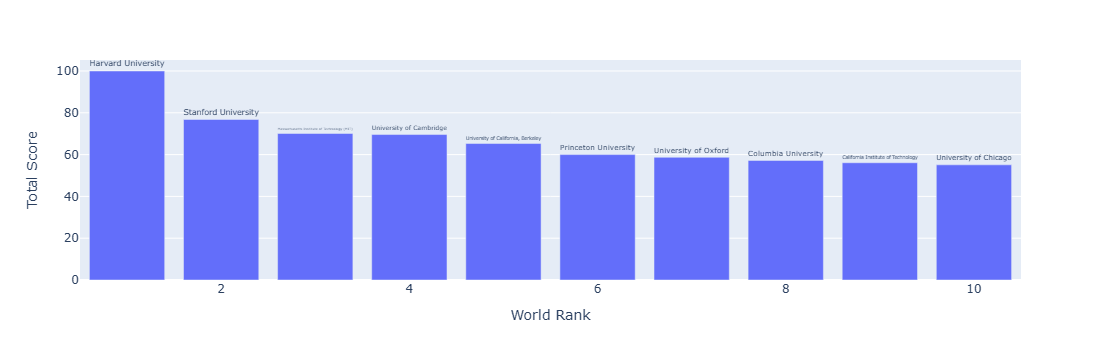

In [375]:
top_10_unis = arwu_df.nlargest(10, 'Total Score')
fig = px.bar(top_10_unis, x='World Rank', y='Total Score', text='University Name')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

#fig = px.bar(arwu_df, x = 'World Rank' , y='Total Score')
#fig.show()

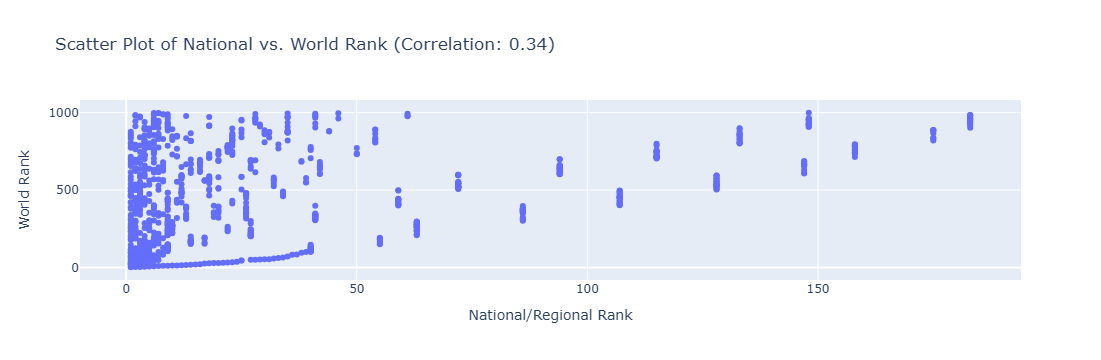

In [374]:
# Assuming arwu_df is already defined
# Calculate correlation
correlation = arwu_df['National/Regional Rank'].corr(arwu_df['World Rank'])

# Create scatter plot
fig = px.scatter(arwu_df, x='National/Regional Rank', y='World Rank', 
                 title=f'Scatter Plot of National vs. World Rank (Correlation: {correlation:.2f})', 
                 hover_name='University Name')

fig.show()


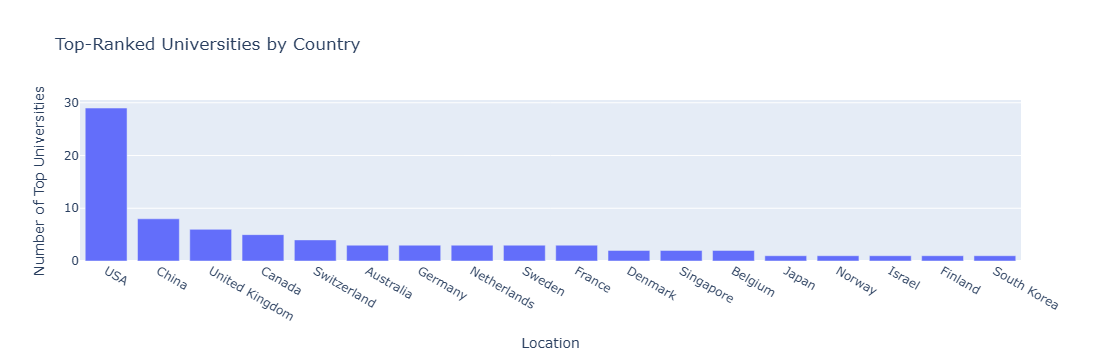

In [373]:
top_ranked = arwu_df[arwu_df['World Rank'] <= 100]  # Adjust the rank threshold as needed
country_counts = top_ranked['Location'].value_counts()

# Bar chart for top-ranked universities by country
fig = px.bar(country_counts, x=country_counts.index, y=country_counts.values, 
             title='Top-Ranked Universities by Country', labels={'x': 'Country', 'y': 'Number of Top Universities'})

fig.show()


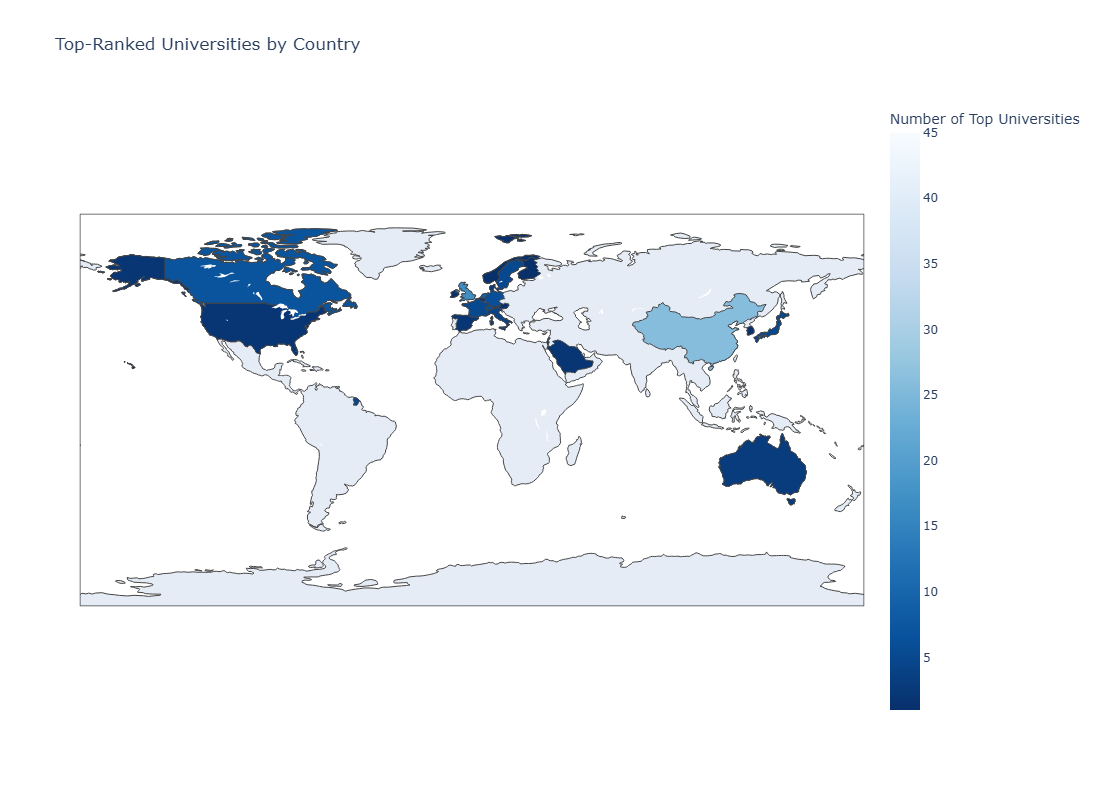

In [378]:
import plotly.express as px

# Filter for top-ranked universities
top_ranked = arwu_df[arwu_df['World Rank'] <= 200]  # Adjust the rank threshold as needed
country_counts = top_ranked['Location'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Top Universities']

# Create a choropleth map
fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Number of Top Universities',
    title='Top-Ranked Universities by Country',
    color_continuous_scale=px.colors.sequential.Blues_r,  # Warmer color scale
    labels={'Number of Top Universities': 'Number of Top Universities'}
)

# Update layout for enlarged map and green background
fig.update_layout(
    width=1200,
    height=800,
)

# Show the plot
fig.show()


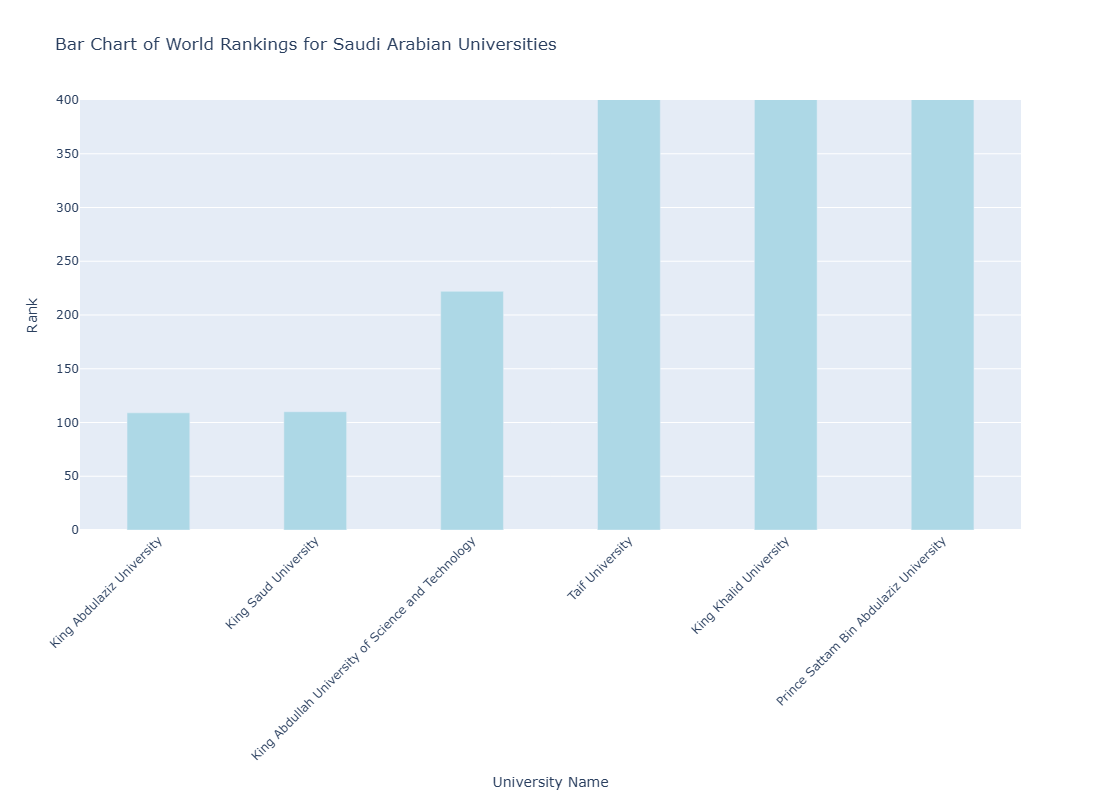

In [371]:
import plotly.graph_objects as go

# Filter data for Saudi Arabian universities
result = arwu_df[arwu_df['Location'] == 'Saudi Arabia']

# Create a bar chart
fig = go.Figure()

# Add bar trace for World Rank only
fig.add_trace(
    go.Bar(
        x=result['University Name'],
        y=result['World Rank'],
        name='World Rank',
        marker_color='lightblue',  # Use a lighter shade for better distinction
        width=0.4  # Increase the width of the bars
    )
)

# Update layout
fig.update_layout(
    title='Bar Chart of World Rankings for Saudi Arabian Universities',
    xaxis_title='University Name',
    yaxis_title='Rank',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better visibility
    yaxis=dict(range=[0, 400]),  # Adjusted y-axis range
    width=1200,
    height=800,
)

fig.show()


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.